In [1]:
# coding: utf-8

# Import useful packages:
import numpy as np
import tensorflow as tf
import cv2
import os
import pickle
import glob
from matplotlib.pyplot import figure, show, cm, imshow
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

/root/miniconda3/envs/carnd_term_1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/miniconda3/envs/carnd_term_1/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Create lists of image filenames:
green_images_1 = glob.glob('bag_dump_just_traffic_light/green/*.jpg')
green_images_2 = glob.glob('bag_dump_loop_with_traffic_light/green/*.jpg')
yellow_images_1 = glob.glob('bag_dump_just_traffic_light/yellow/*.jpg')
yellow_images_2 = glob.glob('bag_dump_loop_with_traffic_light/yellow/*.jpg')
red_images_1 = glob.glob('bag_dump_just_traffic_light/red/*.jpg')
red_images_2 = glob.glob('bag_dump_loop_with_traffic_light/red/*.jpg')
no_light_images_1 = glob.glob('bag_dump_just_traffic_light/nolight/*.jpg') 
no_light_images_2 = glob.glob('bag_dump_loop_with_traffic_light/nolight/*.jpg')
un_identified_images_1 = glob.glob('bag_dump_just_traffic_light/unidentified/*.jpg')
un_identified_images_2 = glob.glob('bag_dump_loop_with_traffic_light/unidentified/*.jpg')

In [4]:
# Print number of images in each list:
count1 = 0
for i in green_images_1:
    count1 += 1
print(count1)
count2 = 0
for i in green_images_2:
    count2 += 1
print(count2)
count3 = 0
for i in yellow_images_1:
    count3 += 1
print(count3)
count4 = 0
for i in yellow_images_2:
    count4 += 1
print(count4)
count5 = 0
for i in red_images_1:
    count5 += 1
print(count5)
count6 = 0
for i in red_images_2:
    count6 += 1
print(count6)
count7 = 0
for i in no_light_images_1:
    count7 += 1
print(count7)
count8 = 0
for i in no_light_images_2:
    count8 += 1
print(count8)
count9 = 0
for i in un_identified_images_1:
    count9 += 1
print(count9)
count10 = 0
for i in un_identified_images_2:
    count10 += 1
print(count10)
count = count1 + count2 + count3 + count4 + count5 + count6 + count7 + count8 + count9 + count10
print(count)

325
131
131
0
186
146
62
812
6
0
1799


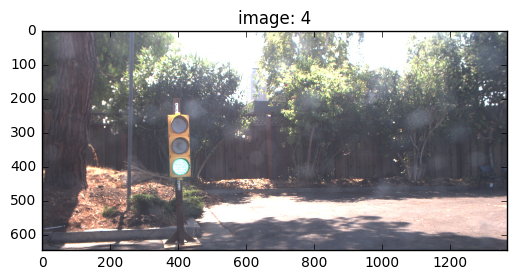

In [5]:
# Example of image:
number = 4
image = cv2.imread(str(green_images_2[number]))
image = image[100:image.shape[0]-350, 0:image.shape[1]]
image_to_show = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title('image: {}'.format(number))
imshow(image_to_show)
show()

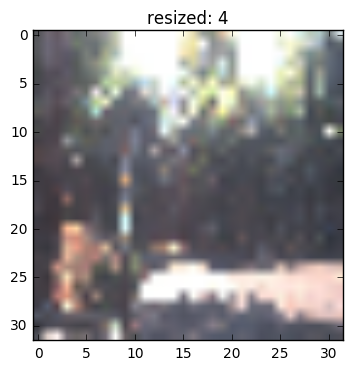

In [6]:
# Example of resized image:
res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
plt.title('resized: {}'.format(number))
res_to_show = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
imshow(res_to_show)
show()

In [7]:
# Image shape.  Should be 32/32/3
print(res.shape[0])
print(res.shape[1])
print(res.shape[2])
print(res.shape)

32
32
3
(32, 32, 3)


In [8]:
X = np.zeros((count, res.shape[0], res.shape[1], res.shape[2]), dtype=np.int)
Y = np.zeros(count, dtype=np.int)

count1 = 0
for i in green_images_1:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count1,:,:,:] = res
    Y[count1] = 2
    count1 += 1
print(count1)

count2 = count1
for i in green_images_2:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count2,:,:,:] = res
    Y[count2] = 2
    count2 += 1
print(count2)

count3 = count2
for i in yellow_images_1:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count3,:,:,:] = res
    Y[count3] = 1
    count3 += 1
print(count3)

count4 = count3
for i in yellow_images_2:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count4,:,:,:] = res
    Y[count4] = 1
    count4 += 1
print(count4)

count5 = count4
for i in red_images_1:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count5,:,:,:] = res
    Y[count5] = 0
    count5 += 1
print(count5)

count6 = count5
for i in red_images_2:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count6,:,:,:] = res
    Y[count6] = 0
    count6 += 1
print(count6)

count7 = count6
for i in no_light_images_1:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count7,:,:,:] = res
    Y[count7] = 4
    count7 += 1
print(count7)

count8 = count7
for i in no_light_images_2:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count8,:,:,:] = res
    Y[count8] = 4
    count8 += 1
print(count8)

count9 = count8
for i in un_identified_images_1:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count9,:,:,:] = res
    Y[count9] = 3
    count9 += 1
print(count9)

count10 = count9
for i in un_identified_images_2:
    image = cv2.imread(str(i))
    image = image[100:image.shape[0]-350, 0:image.shape[1]]
    res = cv2.resize(image, (32, 32), interpolation = cv2.INTER_CUBIC)
    X[count10,:,:,:] = res
    Y[count10] = 3
    count10 += 1
print(count10)

325
456
587
587
773
919
981
1793
1799
1799


In [9]:
f = open(r'dataX.txt', 'wb')
pickle.dump(X, f)
f.close()
f = open(r'dataY.txt', 'wb')
pickle.dump(Y, f)
f.close()

In [10]:
f = open(r'dataX.txt', 'rb')
X = pickle.load(f)
f.close()
f = open(r'dataY.txt', 'rb')
Y = pickle.load(f)
f.close()
print(X.shape)
print(Y.shape)

(1799, 32, 32, 3)
(1799,)


In [11]:
# Max-Min Normalization:
# https://www.mathworks.com/matlabcentral/answers/25759-normalizing-data-for-neural-networks
def Max_Min(Array, ra=0.9, rb=0.1):
    Max = np.max(Array)
    Min = np.min(Array)
    return (ra - rb) * (Array - Min) / (Max - Min) + rb

X_normal = Max_Min(X)
print(X_normal.shape)

(1799, 32, 32, 3)


In [12]:
from sklearn.model_selection import train_test_split
Percent_of_split = 0.20
X_train, X_split, y_train, y_split = train_test_split(X_normal, Y, test_size=Percent_of_split, random_state=1024)
print(X_train.shape)
print(X_split.shape)
print(y_train.shape)
print(y_split.shape)
Percent_of_cv = 0.50
X_cv, X_test, y_cv, y_test = train_test_split(X_split, y_split, test_size=Percent_of_cv, random_state=1024)
print(X_cv.shape)
print(X_test.shape)
print(y_cv.shape)
print(y_test.shape)

(1439, 32, 32, 3)
(360, 32, 32, 3)
(1439,)
(360,)
(180, 32, 32, 3)
(180, 32, 32, 3)
(180,)
(180,)


In [13]:
from sklearn.utils import shuffle

EPOCHS = 50
BATCH_SIZE = 128

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 50.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 50), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(50))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 50. Output = 25.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(50, 25), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(25))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 25. Output = 5.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(25, 5), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(5))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

Training...

84.0 180
EPOCH 1 ...
Validation Accuracy = 0.4666666667
Model saved

94.9999990463 180
EPOCH 2 ...
Validation Accuracy = 0.5277777725
Model saved

98.0000004768 180
EPOCH 3 ...
Validation Accuracy = 0.5444444471
Model saved

120.0 180
EPOCH 4 ...
Validation Accuracy = 0.6666666667
Model saved

126.000000715 180
EPOCH 5 ...
Validation Accuracy = 0.7000000040
Model saved

130.000001431 180
EPOCH 6 ...
Validation Accuracy = 0.7222222302
Model saved

132.999999762 180
EPOCH 7 ...
Validation Accuracy = 0.7388888876
Model saved

139.000000477 180
EPOCH 8 ...
Validation Accuracy = 0.7722222249
Model saved

141.000000477 180
EPOCH 9 ...
Validation Accuracy = 0.7833333360
Model saved

142.000000477 180
EPOCH 10 ...
Validation Accuracy = 0.7888888915
Model saved

144.000000477 180
EPOCH 11 ...
Validation Accuracy = 0.8000000026
Model saved

143.000000477 180
147.999999046 180
EPOCH 13 ...
Validation Accuracy = 0.8222222169
Model saved

144.999999046 180
146.000000715 180
141.9999997

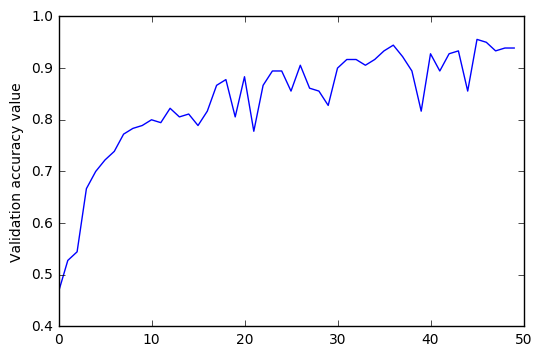

In [21]:
# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 5)

# Training Pipeline
rate = 0.001
logits = LeNet(tf.cast(x, tf.float32))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
 
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
save_file = './save/model.ckpt'
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    print(total_accuracy, num_examples)
    return total_accuracy / num_examples


# Train the Model

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    validation_accuracy0 = 0
    Accuracy_Array = np.zeros(EPOCHS)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_cv, y_cv)
        Accuracy_Array[i] = validation_accuracy
        if validation_accuracy > validation_accuracy0:
            saver.save(sess, save_file)
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.10f}".format(validation_accuracy))
            print("Model saved")
            print()
            validation_accuracy0 = validation_accuracy
        
    print("Job is done!")
    print("Best Validation Accuracy = {:.10f}".format(validation_accuracy0))
    print()
    plt.plot(Accuracy_Array)
    plt.ylabel('Validation accuracy value')
    print('Validation accuracy curve')
    plt.show()